 BAB 1 
 EXPLORATORY DATA ANALYSIS DAN VISULISASI DATA


1. Import Pustaka/Library Python

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib


2. Load Dataset tiktok_scrapper.csv

In [2]:
df = pd.read_csv("data/tiktok_scrapper.csv")

df.head()

,authorMeta.avatar,authorMeta.name,text,diggCount,shareCount,playCount,commentCount,videoMeta.duration,musicMeta.musicName,musicMeta.musicAuthor,musicMeta.musicOriginal,createTimeISO,webVideoUrl
0,https://p16-common-sign-sg.tiktokcdn-us.com/to...,fransmashurtam,RESTORANT FISH &CHEAP POINSQUER LEBAK BULUS JA...,37,0,217,1,115,suara asli - FRANS MASHUR TAM,FRANS MASHUR TAM,True,2025-04-23T11:44:50.000Z,https://www.tiktok.com/@fransmashurtam/video/7...
1,https://p16-common-sign-useast2a.tiktokcdn-us....,noona_rosa,Yedeura~ cempedak goreng enak bangettt sama ko...,8381,93,119100,55,89,오리지널 사운드 - Noona Rosa🇰🇷🇮🇩,Noona Rosa🇰🇷🇮🇩,True,2025-04-23T10:22:45.000Z,https://www.tiktok.com/@noona_rosa/video/74964...
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,soberbites,GOURMET SAUSAGE TEPI JALAN 🔥 📍Sober Bites Bert...,279,54,11700,7,23,original sound,MelodyScript 🎵,True,2025-04-22T05:57:47.000Z,https://www.tiktok.com/@soberbites/video/74960...
3,https://p16-common-sign-sg.tiktokcdn-us.com/to...,vinc.eats,Replying to @dillahgz makan aneka eskrim🍦🍦🍦 en...,468,8,10100,52,54,Mozart Minuet with violin(815356),松本一策,False,2025-04-23T11:08:40.000Z,https://www.tiktok.com/@vinc.eats/video/749646...
4,https://p16-common-sign-va.tiktokcdn-us.com/to...,bebbyrere28,"tiba tiba banget dikirimin sama adekku,mana ba...",64,3,1366,1,348,suara asli - BebbyReree28,BebbyReree28,True,2025-04-23T10:47:40.000Z,https://www.tiktok.com/@bebbyrere28/video/7496...


3. Struktur dan Tipe Data

In [3]:
#untuk mengetahui ukuran data (jumlah baris dan kolom)
df.shape

(346, 13)

In [4]:
#untuk mengethui informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   authorMeta.avatar        346 non-null    object
 1   authorMeta.name          346 non-null    object
 2   text                     336 non-null    object
 3   diggCount                346 non-null    int64 
 4   shareCount               346 non-null    int64 
 5   playCount                346 non-null    int64 
 6   commentCount             346 non-null    int64 
 7   videoMeta.duration       346 non-null    int64 
 8   musicMeta.musicName      346 non-null    object
 9   musicMeta.musicAuthor    344 non-null    object
 10  musicMeta.musicOriginal  346 non-null    bool  
 11  createTimeISO            346 non-null    object
 12  webVideoUrl              346 non-null    object
dtypes: bool(1), int64(5), object(7)
memory usage: 32.9+ KB


In [5]:
# Mengecek missing value 
df.isnull().sum()

authorMeta.avatar           0
authorMeta.name             0
text                       10
diggCount                   0
shareCount                  0
playCount                   0
commentCount                0
videoMeta.duration          0
musicMeta.musicName         0
musicMeta.musicAuthor       2
musicMeta.musicOriginal     0
createTimeISO               0
webVideoUrl                 0
dtype: int64

In [8]:
# Menghapus kolom dengan errors='ignore' agar tidak menimbulkan error jika kolom tidak ditemukan
df.drop(columns=['authorMeta.avatar ','musicMeta.musicAuthor ','musicMeta.musicOriginal'], inplace=True, errors='ignore')

print(df.columns)

Index(['authorMeta.avatar', 'authorMeta.name', 'text', 'diggCount',
       'shareCount', 'playCount', 'commentCount', 'videoMeta.duration',
       'musicMeta.musicName', 'musicMeta.musicAuthor', 'createTimeISO',
       'webVideoUrl'],
      dtype='object')


In [9]:
#analisis statistik deskriptif
df.describe()

,diggCount,shareCount,playCount,commentCount,videoMeta.duration
count,3.460000e+02,3.460000e+02,3.460000e+02,346.000000,346.000000
mean,1.289608e+06,1.579748e+05,1.448947e+07,8792.121387,46.060694
std,2.167293e+06,5.002665e+05,2.376722e+07,17576.656652,69.688119
min,1.000000e+01,0.000000e+00,2.170000e+02,0.000000,0.000000
25%,1.500750e+03,4.725000e+01,3.292500e+04,47.250000,13.000000
50%,2.133000e+05,5.862500e+03,4.300000e+06,1617.500000,19.500000
75%,2.000000e+06,8.990000e+04,1.957500e+07,9030.750000,59.750000
max,1.880000e+07,5.200000e+06,1.845000e+08,140400.000000,692.000000


4. Pembersihan dan Pra Pemrosesan Data

In [10]:
# Mengecek missing value (NaN)
df.isnull().sum()

authorMeta.avatar         0
authorMeta.name           0
text                     10
diggCount                 0
shareCount                0
playCount                 0
commentCount              0
videoMeta.duration        0
musicMeta.musicName       0
musicMeta.musicAuthor     2
createTimeISO             0
webVideoUrl               0
dtype: int64

In [12]:
#Hapus Missing Value (NaN)
df.dropna(inplace=True)

df.isnull().sum()

authorMeta.avatar        0
authorMeta.name          0
text                     0
diggCount                0
shareCount               0
playCount                0
commentCount             0
videoMeta.duration       0
musicMeta.musicName      0
musicMeta.musicAuthor    0
createTimeISO            0
webVideoUrl              0
dtype: int64

In [15]:
#Ekstrak hashtags dari kolom text
def extract_hashtags(text):
    """Ekstrak hashtag dari teks."""
    return re.findall(r'#\w+', str(text)) 

df['hashtags'] = df['text'].apply(extract_hashtags)
print(df['hashtags'])

0      [#fish, #kuliner, #kulinertiktok, #kulinerindo...
1      [#noonarosa, #indonesia, #korean, #kulinertikt...
2      [#klfoodie, #foodiesmalaysia, #makananvira, #f...
3      [#mukbang, #mukbangeatingshow, #eskrim, #eskri...
4      [#pasuruanjawatimur, #kuliner, #reviewmakanan,...
                             ...                        
341          [#fyp, #eagle, #natural, #animals, #CapCut]
342    [#CapCut, #velocity, #capcutvelocity, #slowmo,...
343    [#CapCut, #template, #velocity, #slowmo, #fyp,...
344    [#CapCut, #tendencia, #song, #caplyric, #lyric...
345                [#CapCut, #cat, #cats, #catsoftiktok]
Name: hashtags, Length: 335, dtype: object


In [19]:
# Identify top 10 trending hashtags
hashtag_counts = df.explode("hashtags").groupby("hashtags")["total_interactions"].sum().reset_index()
hashtag_counts = hashtag_counts.sort_values(by="total_interactions", ascending=False).head(10)
top_hashtags = hashtag_counts["hashtags"].tolist()

print(top_hashtags)

['#fyp', '#viral', '#foryou', '#foryoupage', '#trending', '#CapCut', '#reviewmakanan', '#fypシ', '#viral_video', '#viralvideo']


In [20]:
# Menghitung total interaksi
df['total_interactions'] = df['diggCount'] + df['commentCount'] + df['shareCount'] + df['playCount']

df.head()

,authorMeta.avatar,authorMeta.name,text,diggCount,shareCount,playCount,commentCount,videoMeta.duration,musicMeta.musicName,musicMeta.musicAuthor,createTimeISO,webVideoUrl,hashtags,hour,day,text_length,total_interactions
0,https://p16-common-sign-sg.tiktokcdn-us.com/to...,fransmashurtam,RESTORANT FISH &CHEAP POINSQUER LEBAK BULUS JA...,37,0,217,1,115,suara asli - FRANS MASHUR TAM,FRANS MASHUR TAM,2025-04-23 11:44:50+00:00,https://www.tiktok.com/@fransmashurtam/video/7...,"[#fish, #kuliner, #kulinertiktok, #kulinerindo...",11,2,262,255
1,https://p16-common-sign-useast2a.tiktokcdn-us....,noona_rosa,Yedeura~ cempedak goreng enak bangettt sama ko...,8381,93,119100,55,89,오리지널 사운드 - Noona Rosa🇰🇷🇮🇩,Noona Rosa🇰🇷🇮🇩,2025-04-23 10:22:45+00:00,https://www.tiktok.com/@noona_rosa/video/74964...,"[#noonarosa, #indonesia, #korean, #kulinertikt...",10,2,236,127629
2,https://p16-common-sign-sg.tiktokcdn-us.com/to...,soberbites,GOURMET SAUSAGE TEPI JALAN 🔥 📍Sober Bites Bert...,279,54,11700,7,23,original sound,MelodyScript 🎵,2025-04-22 05:57:47+00:00,https://www.tiktok.com/@soberbites/video/74960...,"[#klfoodie, #foodiesmalaysia, #makananvira, #f...",5,1,1443,12040
3,https://p16-common-sign-sg.tiktokcdn-us.com/to...,vinc.eats,Replying to @dillahgz makan aneka eskrim🍦🍦🍦 en...,468,8,10100,52,54,Mozart Minuet with violin(815356),松本一策,2025-04-23 11:08:40+00:00,https://www.tiktok.com/@vinc.eats/video/749646...,"[#mukbang, #mukbangeatingshow, #eskrim, #eskri...",11,2,193,10628
4,https://p16-common-sign-va.tiktokcdn-us.com/to...,bebbyrere28,"tiba tiba banget dikirimin sama adekku,mana ba...",64,3,1366,1,348,suara asli - BebbyReree28,BebbyReree28,2025-04-23 10:47:40+00:00,https://www.tiktok.com/@bebbyrere28/video/7496...,"[#pasuruanjawatimur, #kuliner, #reviewmakanan,...",10,2,134,1434


In [16]:
# ubah kolom waktu dalam format datetime
df['createTimeISO'] = pd.to_datetime(df['createTimeISO'])

# Menyusun data berdasarkan waktu
df['hour'] = df['createTimeISO'].dt.hour
df['day'] = df['createTimeISO'].dt.dayofweek

In [17]:
# Panjang teks (sebagai fitur numerik)
df['text_length'] = df['text'].astype(str).apply(len)

5. Visualisasi Data

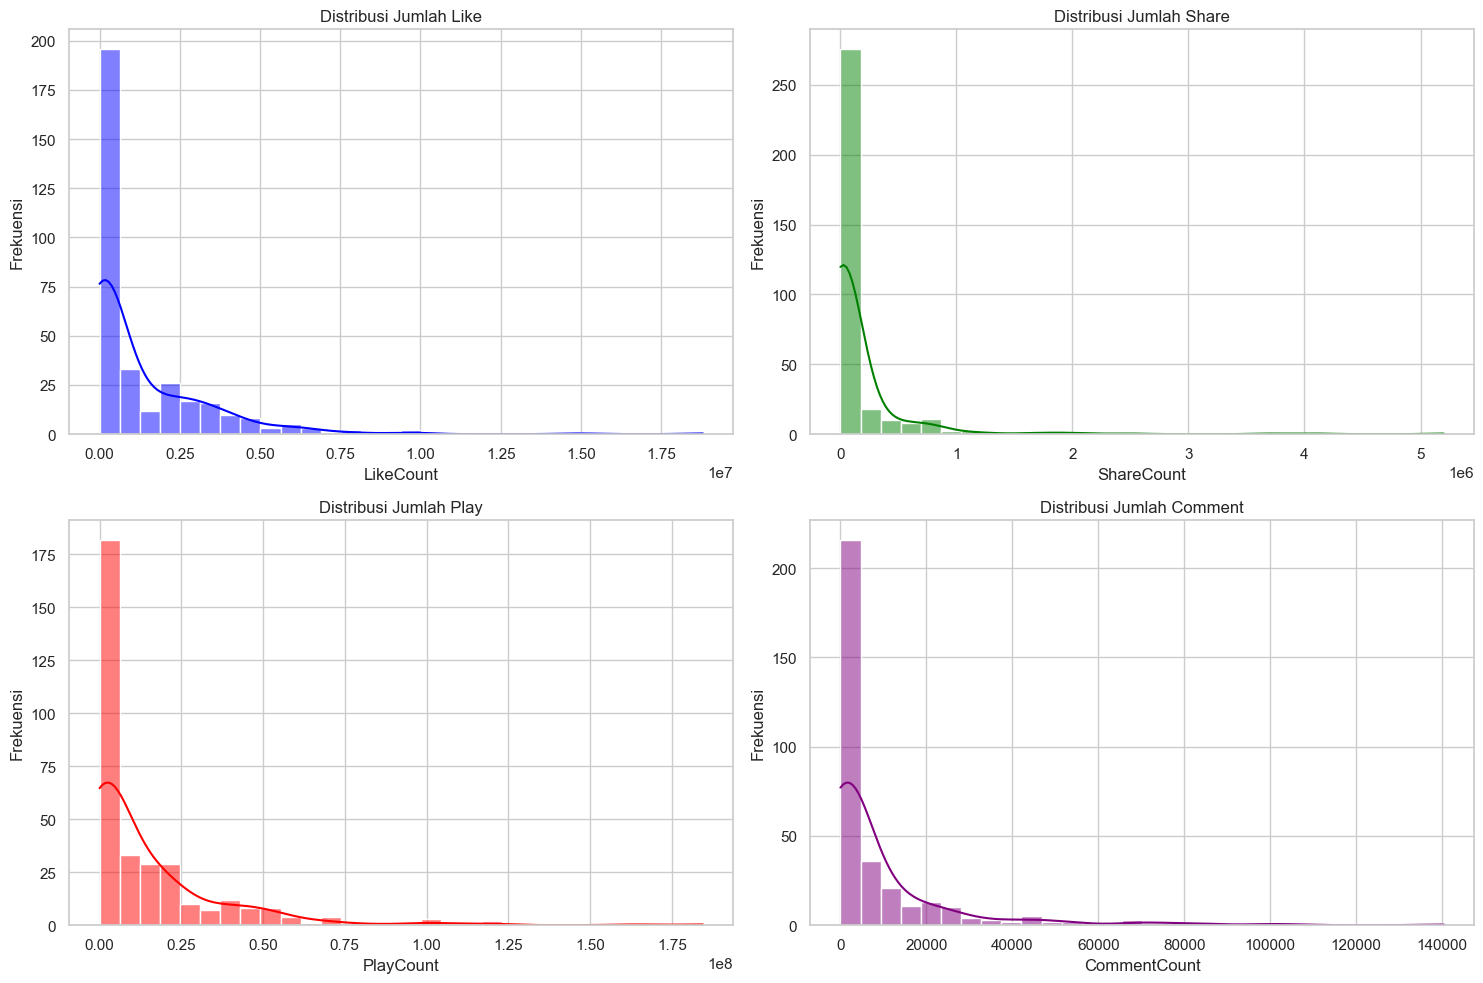

In [21]:
#//Visualisasi kolom numerik//

# Set style plot
sns.set(style="whitegrid")

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(15, 10))

# Plot Digg Count
plt.subplot(2, 2, 1)  # Menentukan baris ke-2 dan kolom ke-2 pada grid 2x2
sns.histplot(df['diggCount'], kde=True, color='blue', bins=30)
plt.title('Distribusi Jumlah Like')
plt.xlabel('LikeCount')
plt.ylabel('Frekuensi')

# Plot Share Count
plt.subplot(2, 2, 2)
sns.histplot(df['shareCount'], kde=True, color='green', bins=30)
plt.title('Distribusi Jumlah Share')
plt.xlabel('ShareCount')
plt.ylabel('Frekuensi')

# Plot Play Count
plt.subplot(2, 2, 3)
sns.histplot(df['playCount'], kde=True, color='red', bins=30)
plt.title('Distribusi Jumlah Play')
plt.xlabel('PlayCount')
plt.ylabel('Frekuensi')

# Plot Comment Count
plt.subplot(2, 2, 4)
sns.histplot(df['commentCount'], kde=True, color='purple', bins=30)
plt.title('Distribusi Jumlah Comment')
plt.xlabel('CommentCount')
plt.ylabel('Frekuensi')

# Menampilkan plot secara bersamaan
plt.tight_layout()  # Mengatur jarak antar plot agar lebih rapi
plt.show()


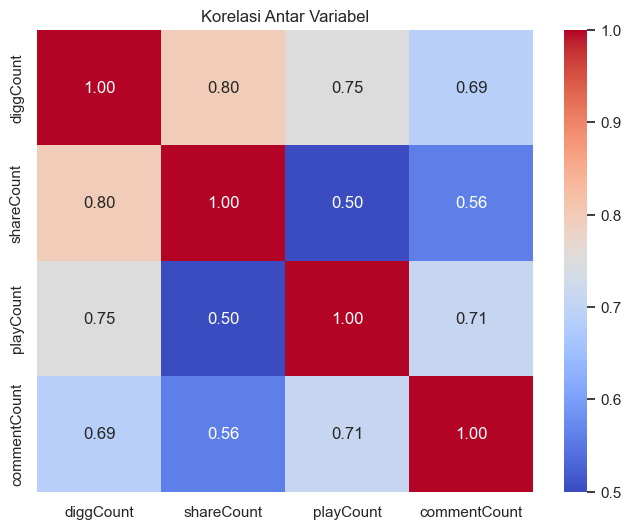

In [22]:
# Menghitung korelasi antar fitur numerik
correlation_matrix = df[['diggCount', 'shareCount', 'playCount', 'commentCount']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()


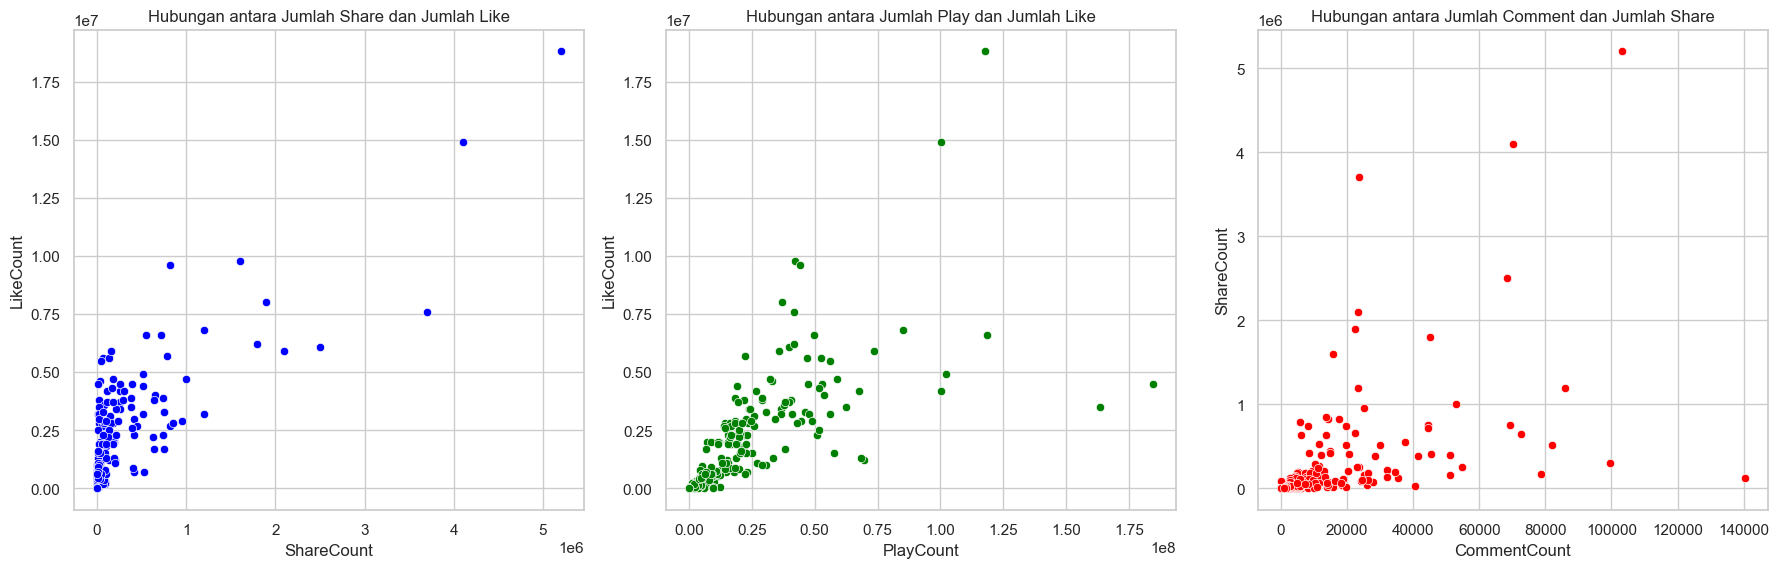

In [23]:
##Visualisasi Hubungan Antar Fitur Menggunakan Scatter Plot

# Membuat 1 baris dengan 3 kolom untuk visualisasi
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualisasi hubungan antara Share Count dan Digg Count
sns.scatterplot(x='shareCount', y='diggCount', data=df, color='blue', ax=axes[0])
axes[0].set_title('Hubungan antara Jumlah Share dan Jumlah Like')
axes[0].set_xlabel('ShareCount')
axes[0].set_ylabel('LikeCount')

# Visualisasi hubungan antara Play Count dan Digg Count
sns.scatterplot(x='playCount', y='diggCount', data=df, color='green', ax=axes[1])
axes[1].set_title('Hubungan antara Jumlah Play dan Jumlah Like')
axes[1].set_xlabel('PlayCount')
axes[1].set_ylabel('LikeCount')

# Visualisasi hubungan antara Comment Count dan Share Count
sns.scatterplot(x='commentCount', y='shareCount', data=df, color='red', ax=axes[2])
axes[2].set_title('Hubungan antara Jumlah Comment dan Jumlah Share')
axes[2].set_xlabel('CommentCount')
axes[2].set_ylabel('ShareCount')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


6. Analisis Berdasarkan Waktu

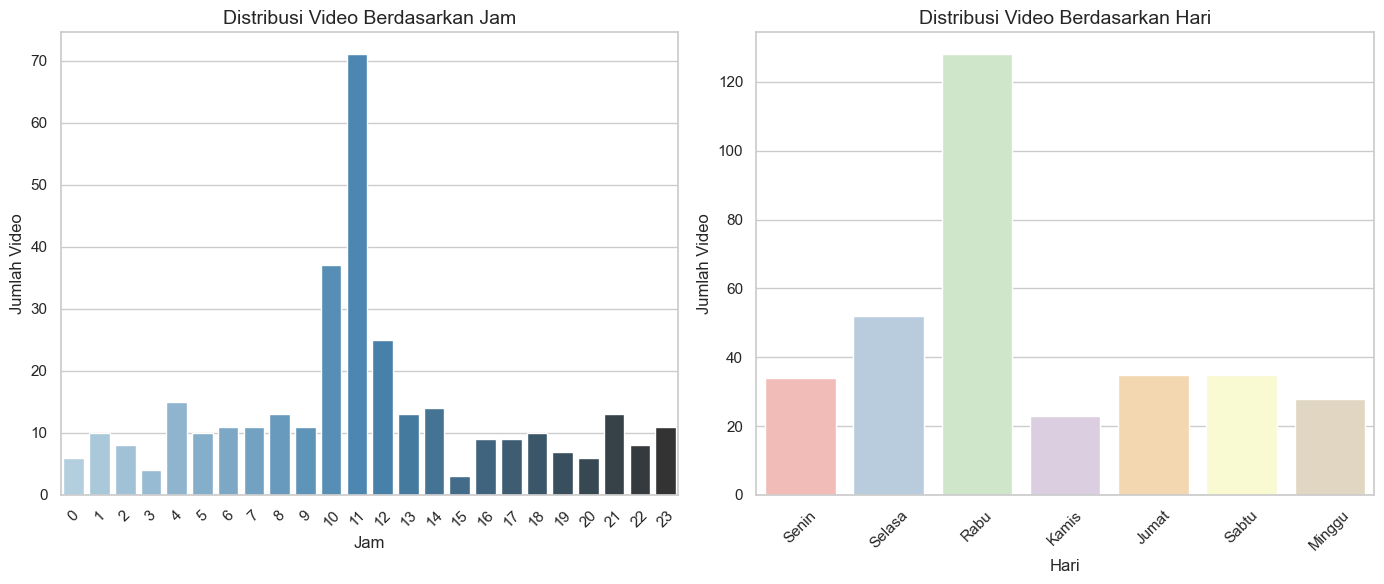

In [24]:
# Membuat frame dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisasi distribusi konten berdasarkan jam
sns.countplot(x='hour', hue='hour', data=df, ax=axes[0], palette='Blues_d', legend=False)
axes[0].set_title('Distribusi Video Berdasarkan Jam', fontsize=14)
axes[0].set_xlabel('Jam', fontsize=12)
axes[0].set_ylabel('Jumlah Video', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi distribusi konten berdasarkan hari
sns.countplot(x='day', hue='day', data=df, ax=axes[1], palette='Pastel1', legend=False)
axes[1].set_title('Distribusi Video Berdasarkan Hari', fontsize=14)
axes[1].set_xlabel('Hari', fontsize=12)
axes[1].set_ylabel('Jumlah Video', fontsize=12)

# Pastikan ticks sesuai
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], rotation=45)

# Menambahkan jarak antar plot
plt.tight_layout()

# Menampilkan plot
plt.show()

7. Analisis Berdasarkan Kategori Music

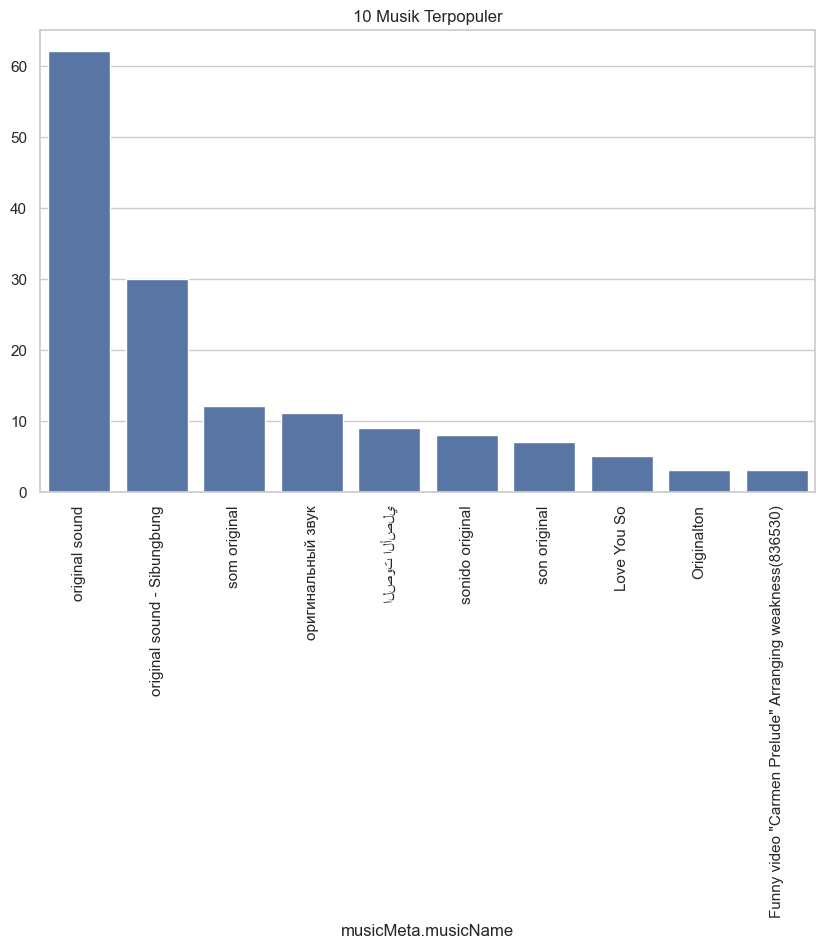

In [25]:
# Visualisasi jumlah video berdasarkan musik
music_count = df['musicMeta.musicName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=music_count.index, y=music_count.values)
plt.xticks(rotation=90)
plt.title('10 Musik Terpopuler')
plt.show()


BAB 2  MODEL PREDIKSI ALGORITMA RANDOM FOREST CLASSIFIER

1. Pra Pemrosesan Data

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.92      0.63        12
           1       0.98      0.79      0.87        56

    accuracy                           0.81        68
   macro avg       0.73      0.85      0.75        68
weighted avg       0.89      0.81      0.83        68

Accuracy: 0.8088235294117647


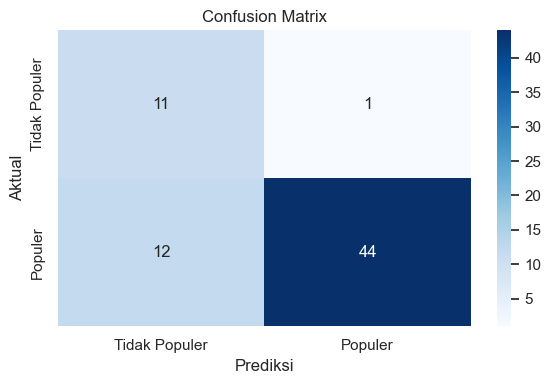

['model/le_music.pkl']

In [41]:
# Load data
df = pd.read_csv("data/tiktok_scrapper.csv")

# Hapus data yang memiliki nilai kosong pada kolom penting
df.dropna(subset=['text', 'authorMeta.name', 'musicMeta.musicName'], inplace=True)

# Label encoding untuk fitur kategorikal
le_name = LabelEncoder()
df['authorMeta.name_encoded'] = le_name.fit_transform(df['authorMeta.name'])

le_music = LabelEncoder()
df['musicMeta.musicName_encoded'] = le_music.fit_transform(df['musicMeta.musicName'])

# Fitur panjang teks
df['text_length'] = df['text'].astype(str).apply(len)

# Konversi waktu ke detik dari waktu minimum
df['createTimeISO'] = pd.to_datetime(df['createTimeISO'])
df['createTimeISO'] = (df['createTimeISO'] - df['createTimeISO'].min()).dt.total_seconds()

# Buat label target: Populer jika jumlah interaksi lebih dari 10.000
df['is_popular'] = df[['diggCount', 'commentCount', 'shareCount', 'playCount']].apply(
    lambda x: 1 if x.sum() > 10000 else 0, axis=1
)

# Pilih fitur yang digunakan
features = [
    'videoMeta.duration', 'text_length',
    'authorMeta.name_encoded', 'musicMeta.musicName_encoded',
    'createTimeISO'
]
X = df[features]
y = df['is_popular']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Oversampling data minoritas pada data latih
train_df = pd.concat([X_train, y_train], axis=1)
df_majority = train_df[train_df['is_popular'] == 0]
df_minority = train_df[train_df['is_popular'] == 1]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

df_train_balanced = pd.concat([df_majority, df_minority_upsampled])
X_train_balanced = df_train_balanced[X.columns]
y_train_balanced = df_train_balanced['is_popular']

# Latih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Prediksi data uji
y_pred = rf.predict(X_test)

# Evaluasi hasil
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Populer', 'Populer'],
            yticklabels=['Tidak Populer', 'Populer'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Simpan model dan encoder
joblib.dump(rf, 'model/rf_model.pkl')
joblib.dump(le_name, 'model/le_name.pkl')
joblib.dump(le_music, 'model/le_music.pkl')